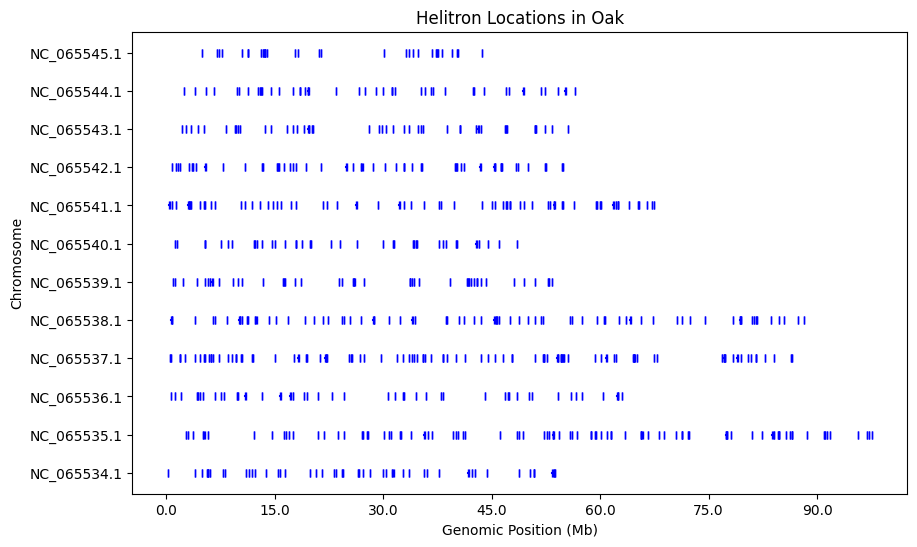

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def parse_fasta(file_path):
    sequences = {}
    with open(file_path, 'r') as file:
        current_seq = ''
        for line in file:
            if line.startswith('>'):
                current_seq = line.strip()
                sequences[current_seq] = ''
            else:
                sequences[current_seq] += line.strip()
    return sequences

def extract_locations(sequences):
    locations = []
    for header in sequences:
        #e.g. header format: ">OW028765.1_#SUB_479119-482250 [forward]"
        parts = header.split('_#SUB_')
        if len(parts) == 2:
            chrom = parts[0].lstrip('>')
            loc = parts[1].split(' ')[0]  # Take only the "start-end" part
            start, end = map(int, loc.split('-'))
            locations.append((chrom, start, end))
    return locations


def plot_locations(locations):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting with base pair positions, but will convert x-axis to megabases
    for chrom, start, end in locations:
        ax.plot([start / 1_000_000, end / 1_000_000], [chrom, chrom], marker='|', linestyle='-', color='b')

    ax.set_xlabel('Genomic Position (Mb)')
    ax.set_ylabel('Chromosome')
    ax.set_title('Helitron Locations in Oak')

    # Format x-axis to display ticks in megabases
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.1f}'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.show()

file_path = "/content/oak_whole_genome_draw.hel.fa"
sequences = parse_fasta(file_path)
locations = extract_locations(sequences)
plot_locations(locations)


In [23]:
print(sequences)

{">NC_003070.9_#SUB_15106-18729 [forward] 3624 bps; scores=7:5 Multi_5'_ends:": 'TCTATGTAATGTATTAAGATCACCATGTCTTACGTACGATGTTCGTTTCAGGCATAAGTCATCATTGCAGAAAGAAAAACCCGATCAATAGAGAAActaagatataaaaaaaacatcagaaaaaaaaaaatcatctgcGCTGTATACATcaatttcaatcaaaattatataacaagaATTATTATAatgacattaatatttttattattttattcctATGTGTCATAGTCATCAACATCCATAACAAGAGCGTTTGATGTTTTGAGACAGCAAGAAAATGTCTAAATCTGCAACACCTGGTCAAATATTTCCCAGTAATTAAAAAGcgtaattattattaatattattgaaGTATTCTTATTATACATCATACATGCATCACTACATTagtcaaaatatatgaatcatCTAATAAGCACGTGTAACGGAATATATAATAAGTAGGTGATACTTTGAAACACGACGGATCTTGTATTTGACAAATCGTCGATTATGATCAacaattttactaatttataaactatgtatttttctattatatatgcAGATTTCCTACATAGCTTTCGAGTAAGACTAATTAATCACGTAAGTGTGTTAAACTGTTAATTATACTTGAACTATGTGTTTATTGGACTATTGGTTCAAGTTTTCCcgtcaaaataaataaaagtcaCTAACCACTGTAAAATTGAATCTAACGTACGAAATCGGTTTAGTGTGATctttatatttcaaataattttctgTAATCGAGATGATATAGGggtatattatatacatatatatatattttgccTAATTATAAAGTATGGCATGAAAAAGGTTGGCCTGCAAGCAGCCCTCGCTCTTTAATTTAAAGGCAAAgctaaaacaaaaagcaatTTATTAGtgacatataatatttttactatttaccAAG

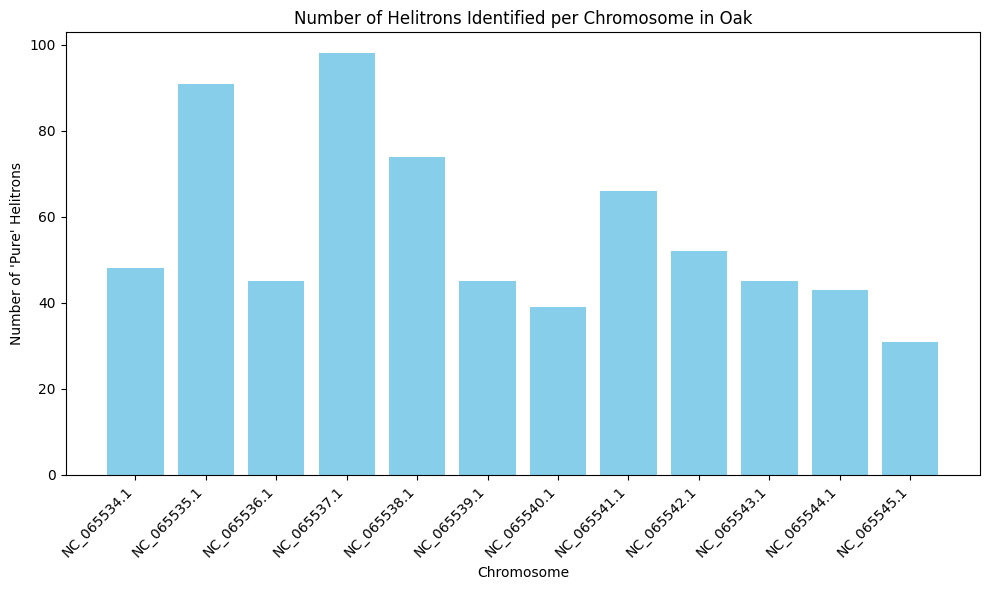

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import defaultdict

def parse_fasta(file_path):
    sequences = {}
    with open(file_path, 'r') as file:
        current_seq = ''
        for line in file:
            if line.startswith('>'):
                current_seq = line.strip()
                sequences[current_seq] = ''
            else:
                sequences[current_seq] += line.strip()
    return sequences

def extract_locations(sequences):
    locations = []
    for header in sequences:
        # Example header format: ">OW028765.1_#SUB_479119-482250 [forward]"
        parts = header.split('_#SUB_')
        if len(parts) == 2:
            chrom = parts[0].lstrip('>')
            loc = parts[1].split(' ')[0]  # Take only the "start-end" part
            start, end = map(int, loc.split('-'))
            locations.append((chrom, start, end))
    return locations

def count_sequences_per_chromosome(locations):
    chromosome_counts = defaultdict(int)
    for chrom, _, _ in locations:
        chromosome_counts[chrom] += 1
    return dict(chromosome_counts)

def plot_bar_chart(chromosome_counts):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create lists of chromosomes and their counts for plotting
    chromosomes = list(chromosome_counts.keys())
    counts = list(chromosome_counts.values())

    # Plot the bar chart
    ax.bar(chromosomes, counts, color='skyblue')

    ax.set_xlabel('Chromosome')
    ax.set_ylabel("Number of 'Pure' Helitrons")
    ax.set_title('Number of Helitrons Identified per Chromosome in Oak')

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

file_path = "/content/oak_whole_genome_draw.hel.fa"
sequences = parse_fasta(file_path)
locations = extract_locations(sequences)
chromosome_counts = count_sequences_per_chromosome(locations)
plot_bar_chart(chromosome_counts)
